# Tarea 2: *Nutrients*

*Carolina Giménez Arias*

In [2]:
#Importamos las librerías con las que se va a trabajar

import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
pd.options.display.max_rows = 100
db = json.load(open('./foods-2011-10-03.json'))

print("Keys: ", db[0].keys())
print("Nutrient 0: ",db[0]['nutrients'][0])

Keys:  dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])
Nutrient 0:  {'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}


- ¿Qué grupos de alimentos tienen más magnesio? ¿y más vitaminas?

-  ¿Qué tipo de nutrientes tienen los productos cárnicos? (beef and pork) ... comparalos con los vegetales.  

In [5]:

# Exploramos los nutrientes 
nutrients = pd.DataFrame(db[0]['nutrients'])
print(nutrients[:10])

# Data Frame con la info importante asociada a los nutrientes (se filtra el resto: tags, portions,...)
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)

print("Info: ", info[:10])
pd.options.display.max_rows = 100
pd.value_counts(info.group)

# Lista de Data Frame de nutrientes
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)
print(nutrients[:10])


                   description        group units    value
0                      Protein  Composition     g    25.18
1            Total lipid (fat)  Composition     g    29.20
2  Carbohydrate, by difference  Composition     g     3.06
3                          Ash        Other     g     3.28
4                       Energy       Energy  kcal   376.00
5                        Water  Composition     g    39.28
6                       Energy       Energy    kJ  1573.00
7         Fiber, total dietary  Composition     g     0.00
8                  Calcium, Ca     Elements    mg   673.00
9                     Iron, Fe     Elements    mg     0.64
Info:                                           description                   group  \
0                                    Cheese, caraway  Dairy and Egg Products   
1                                    Cheese, cheddar  Dairy and Egg Products   
2                                       Cheese, edam  Dairy and Egg Products   
3                       

In [6]:

nutrients.duplicated().sum()
nutrients = nutrients.drop_duplicates()

col_mapping = {'description' : 'food', 'group' : 'fgroup'}
info = info.rename(columns=col_mapping, copy = False)
col_mapping = {'description' : 'nutrient', 'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
ndata = pd.merge(nutrients, info, on='id', how='outer')
print(ndata.iloc[375173])


nutrient                 Fatty acids, total saturated
nutgroup                                        Other
units                                               g
value                                           0.072
id                                              43546
food            Babyfood, banana no tapioca, strained
fgroup                                     Baby Foods
manufacturer                                     None
Name: 375173, dtype: object


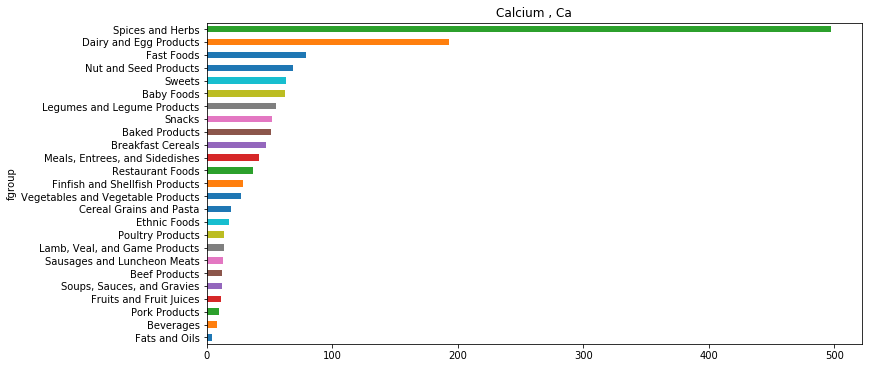

In [293]:

plt.figure(figsize=(12,5))
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Calcium, Ca'].sort_values().plot(kind='barh')
plt.title("Calcium , Ca")
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)
plt.show()


¿Qué grupos de alimentos tienen más magnesio? ¿y más vitaminas?

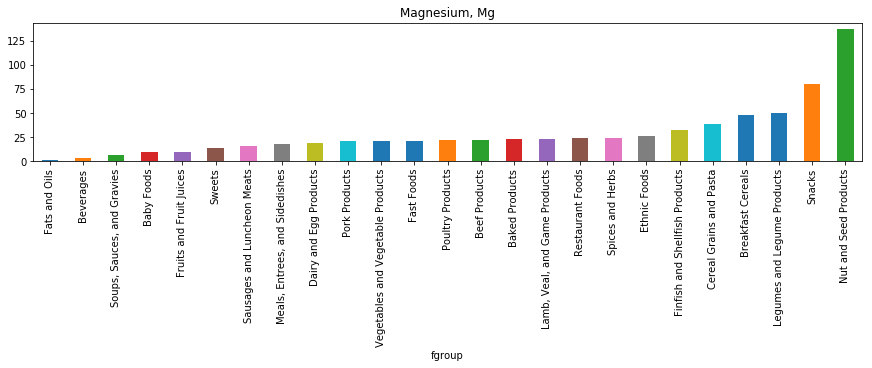

In [296]:
# Para el Magnesio:
plt.figure(figsize=(12,5))
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5) #Agrupamos por nutriente y grupos de alimentos
result['Magnesium, Mg'].sort_values().plot(kind='bar') # Seleccionamos el Magnesio
plt.title("Magnesium, Mg")
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)
plt.show()

Sin duda el grupo de alimentos con más magnesio son las nueces y semillas, con aproximadamente 140 gramos. Le siguen los *snacks* con algo más de 80 gramos y, posteriormente, las legumbres y los cereales para desayunos con, aproximadamente 55 gramos de Magnesio.

Debido a que existen numerosos tipos de vitaminas, para  estudiar qué grupos de alimentos tienen más, en primer lugar se examinarán las distintas cantidades de vitaminas presentes en los datos. De este modo, se estudiarán aquellas cuyas cantidades resulten más significativas, calculando el promedio de sus valores , en algunos casos, el total de vitaminas de cada subgrupo.

In [192]:
print("Las distintas unidades en las que se miden las cantidades de vitaminas son:", ndata.query('nutgroup == "Vitamins"')['units'].unique())


Las distintas unidades en las que se miden las cantidades de vitaminas son: ['IU' 'mcg' 'mcg_RAE' 'mg' 'mcg_DFE']


En primer lugar, separaremos aquellas cuyas unidades estén en miligramos:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114005e48>],
      dtype=object)

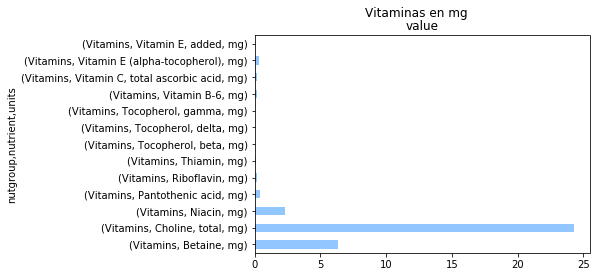

In [163]:
pruebamg = ndata.query('units == "mg"')# Seleccionamos el subgrupo en mg
resvit = pd.DataFrame(pruebamg.groupby(['nutgroup', 'nutrient','units'])['value'].quantile(0.5)) #agrupamos y calculamos media
resvitmg = resvit.query('nutgroup == "Vitamins"')
resvitmg.sort_values(by = "nutgroup").plot(kind='barh', legend = None, subplots = True, title = "Vitaminas en mg")

Es conocido que algunas vitaminas como la vitamina A o la vitamina D se miden en IU (International Units o unidades internacionales). El equivalente biológico de 1 IU de vitamina A equivale a 0,3 μg de retinol, o de 1,8 μg de beta-caroteno. Calcularemos el total de vitamina A y D presente para hacer una comparación de cuál de estas dos es la que aparece en mayor cantidad en los alimentos: 

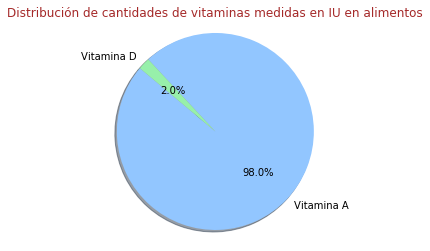

In [201]:
vitaminaAD = ndata.query('units == "IU"').groupby(['nutrient'])['value'].sum()
#vitaminaAD.plot(kind='pie', legend = None, subplots = True, title = "Vitaminas en UI")

sizes = vitaminaAD.values
labels = ["Vitamina A", "Vitamina D"]

# Plot
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.title("Distribución de cantidades de vitaminas medidas en IU en alimentos", color = "brown")

plt.show()

Se aprecia como la vitamina A es mucho más mayoritaria que la D.

Ahora estudiaremos cual es la cantidad media de vitaminas medidas en mcg:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116d1fc18>],
      dtype=object)

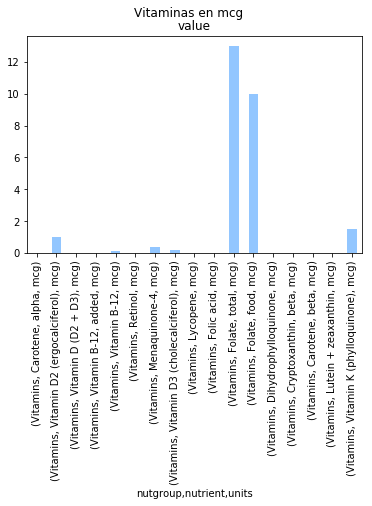

In [184]:
pruebamcg = ndata.query('units == "mcg"')
resvit2 = pd.DataFrame(pruebamcg.groupby(['nutgroup', 'nutrient','units'])['value'].quantile(0.5)) #agrupamos y calculamos media
resvitmcg = resvit2.query('nutgroup == "Vitamins"')
resvitmcg.sort_values(by = "nutgroup").plot(kind='bar', legend = None, subplots = True, title = "Vitaminas en mcg")


In [181]:
ndata.query('units == "mcg"')

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
17,"Selenium, Se",Elements,mcg,14.50,1008,"Cheese, caraway",Dairy and Egg Products,
19,Retinol,Vitamins,mcg,262.00,1008,"Cheese, caraway",Dairy and Egg Products,
27,"Folate, total",Vitamins,mcg,18.00,1008,"Cheese, caraway",Dairy and Egg Products,
28,Vitamin B-12,Vitamins,mcg,0.27,1008,"Cheese, caraway",Dairy and Egg Products,
29,Folic acid,Vitamins,mcg,0.00,1008,"Cheese, caraway",Dairy and Egg Products,
30,"Folate, food",Vitamins,mcg,18.00,1008,"Cheese, caraway",Dairy and Egg Products,
77,"Fluoride, F",Elements,mcg,34.90,1009,"Cheese, cheddar",Dairy and Egg Products,
79,"Selenium, Se",Elements,mcg,13.90,1009,"Cheese, cheddar",Dairy and Egg Products,
81,Retinol,Vitamins,mcg,258.00,1009,"Cheese, cheddar",Dairy and Egg Products,
83,"Carotene, beta",Vitamins,mcg,85.00,1009,"Cheese, cheddar",Dairy and Egg Products,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1135c1518>],
      dtype=object)

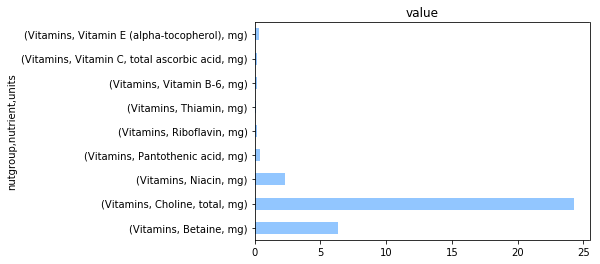

In [141]:
# Para las vitaminas:

# Agrupamos por el grupo nutricional ya que, como en este caso tenemos varias vitaminas distintas, será más cómodo 
# seleccionarlas por el nutgroup y calculamos la media
#resvit = pd.DataFrame(ndata.groupby(['nutgroup', 'nutrient','units'])['value'].quantile(0.5)) 
#resvit = resvit.query('nutgroup == "Vitamins"')
#resvitmg = resvit.query('units == "g"')
#resvitmg = resvitmg.query('value > 0.3') #consideraremos como significativos los valores superiores a 0.3 mg

pruebamg = ndata.query('units == "mg"')# Seleccionamos el subgrupo en mg
resvit = pd.DataFrame(pruebamg.groupby(['nutgroup', 'nutrient','units'])['value'].quantile(0.5))
resvitmg = resvit.query('nutgroup == "Vitamins" & value > 0.05')
resvitmg.sort_values(by = "nutgroup").plot(kind='barh', legend = None, subplots = True)

#resvitg = resvitg.query('value > 0.5')
#resvitg = resvitg.query('nutgroup == "Vitamins"') #Seleccionamos el nutgroup de vitaminas

#resvitg.sort_values(by = "nutgroup").plot(kind='bar', legend = None, subplots = True)
#plt.title("Vitamins")

#plt.show()

Se observa como, tanto la Vitamina A como la Colina y el Folato son las más destacables en cada subgrupo, razón por la cual se estudiará la presencia de estas en los grupos nutricionales:

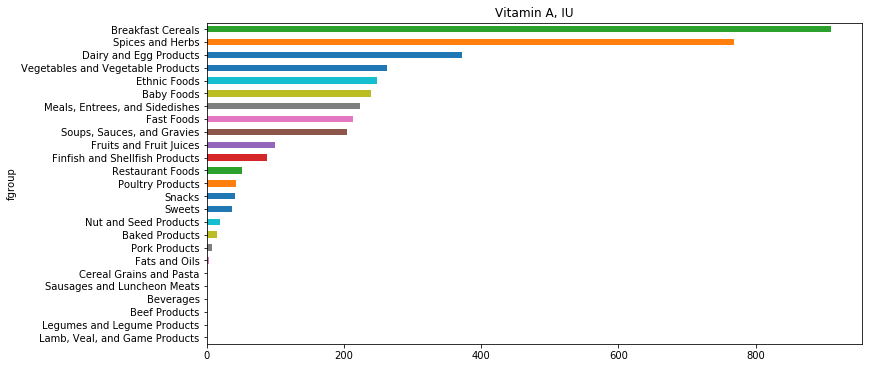

In [276]:
# Para la vitamina A
plt.figure(figsize=(12,5))
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5) #Agrupamos por nutriente y grupos de alimentos
result['Vitamin A, IU'].sort_values().plot(kind='barh') # Seleccionamos la Vitamina A, IU

plt.title("Vitamin A, IU")
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)
plt.show()

La Vitamina A aparece sobretodo en cereales, en hierbas y especias, así como en lácteos y huevos.

La segunda más predominante es la *Choline* o colina en español, esta aparece sobretodo en carnes como la ternera o el cordero y en demás productos cárnicos (como el vacuno y el cerdo)

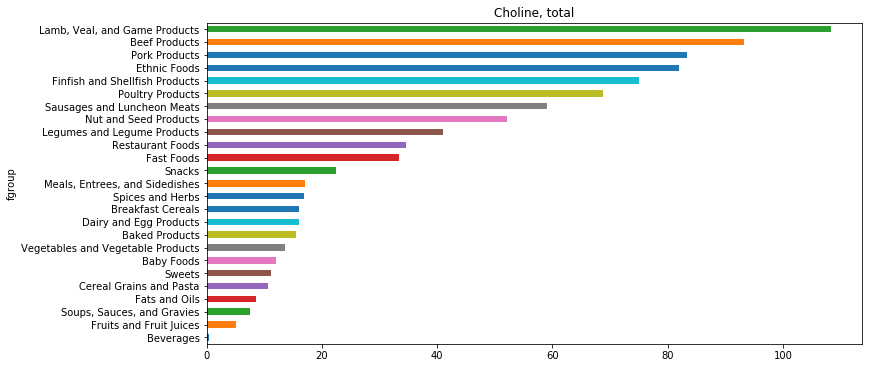

In [249]:
plt.figure(figsize=(12,5))
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5) #Agrupamos por nutriente y grupos de alimentos
result['Choline, total'].sort_values().plot(kind='barh') # Seleccionamos la Vitamina A, IU
plt.title("Choline, total")
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)
plt.show()

- ¿Qué tipo de nutrientes tienen los productos cárnicos? (beef and pork) ... comparalos con los vegetales. 

In [1]:
plt.figure()
res1 = pd.DataFrame(ndata.groupby(['fgroup', 'nutrient'])['value'].quantile(0.5))

# Para beef
res1 = res1.query('value > 10')
resbeef = res1.query('fgroup == "Beef Products"')

#plt.figure(figsize=(12,5))
resbeef.sort_values(by = "fgroup").plot(kind='barh', legend=None, color = 'indianred')
plt.title("Beef Products")
#plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)


# Para pork
#plt.figure(figsize=(12,5))
res1 = pd.DataFrame(ndata.groupby(['fgroup', 'nutrient'])['value'].quantile(0.5))
respork = res1.query('value > 10 & fgroup == "Pork Products')
#respork = res2.query('fgroup == "Pork Products"')
respork.sort_values(by = "fgroup").plot(kind='barh', legend=None, color = 'lightsalmon')
plt.title("Pork Products")
#plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)


# Para verduras
res1 = pd.DataFrame(ndata.groupby(['fgroup', 'nutrient'])['value'].quantile(0.5))
res2 = res1.query('value > 10')
resveg = res2.query('fgroup == "Vegetables and Vegetable Products"')
resveg.sort_values(by = "fgroup").plot(kind='barh', legend=None, color = 'yellowgreen')
plt.title("Vegetables and Vegetable Products")

plt.show()


NameError: name 'plt' is not defined

En los productos cárnicos predominan la Energía y el Potasio (tanto en los provenientes de la vaca como los del cerdo), destacando que parece ser que el cerdo aporta más energía (sobre los 450 g, mientras que el cerdo se queda en aproximadamente 430 g). Ambas variedades de carne poseen prácticamente los mismos nutrientes, sólo difieren en que el cerdo aporta Vitamina D y la vaca Calcio y Betamina. Los niveles de colesterol suelen ser más altos en carnes de vacuno (estarían sobre los 90 g) que en las de cerdo, los cuales se aproximan a 80g, sin embargo, sería necesario estudiar si dicho colesterol se refiere a HDL o a LDL, comúnmente conocidos como "colesterol del bueno" o "colesterol del malo" para poder indicar si es contraproducente o no la ingesta de este tipo de alimentos en determinadas personas (por ejemplo en aquellas con cardioparías concretas).

En cuanto a la comparación de este tipo de carnes con las verduras, se observa que en estas predomina la concentración de potasio, la cual ronda los 265 g, y la de vitamina A, que se encuentra en aproximadamente 260g. También aparecen niveles altos de beta caroteno (aproximadamente 170 g). Destacar que, tanto la vitamina A como el beta caroteno no se encontraban presentes en los productos cárnicos de cerdo y vaca.

Text(0.5,1,'Vegetables and Vegetable Products')

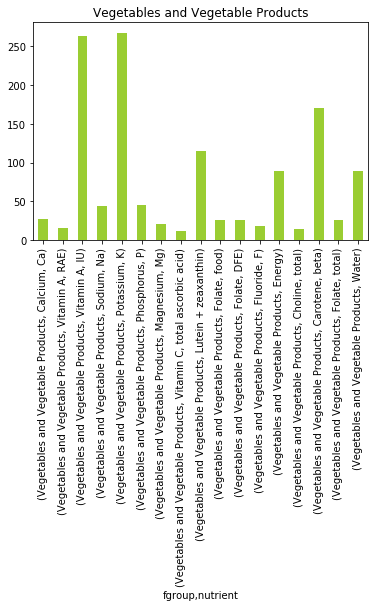

In [64]:
res1 = pd.DataFrame(ndata.groupby(['fgroup', 'nutrient'])['value'].quantile(0.5))
res2 = res1.query('value > 10')
resveg = res2.query('fgroup == "Vegetables and Vegetable Products"')
resveg.sort_values(by = "fgroup").plot(kind='bar', legend=None, color = 'yellowgreen')
plt.title("Vegetables and Vegetable Products")

In [18]:
res1['food'].unique()

array(['Cheese, caraway', 'Cheese, cheddar', 'Cheese, edam', ...,
       'Babyfood, juice, pear',
       'Babyfood, dessert, banana yogurt, strained',
       'Babyfood, banana no tapioca, strained'], dtype=object)

Para complementar este estudio, examinaremos, para el caso de las chucherías, cuáles son los principales nutrientes presentes.

<Figure size 864x360 with 0 Axes>

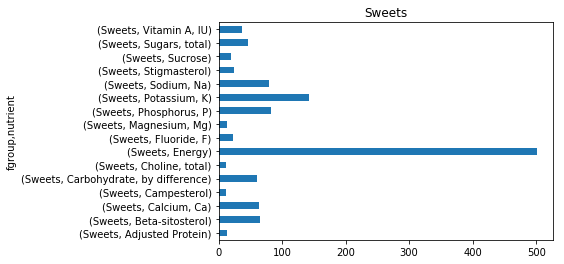

In [310]:

res1 = ndata.groupby(['fgroup', 'nutrient'])['value'].quantile(0.5)
res1 = pd.DataFrame(res1)
res1 = res1.query('value > 10') # Se considerarán valores superiores a 10 gramos
res1 = res1.query('fgroup == "Sweets"')

plt.figure(figsize=(12,5))
res1.sort_values(by = "fgroup").plot(kind = 'barh', legend = None, subplots = True)
plt.title("Sweets")
plt.show()


Tal y como se podía deducir, las golosinas aportan grandes cantidades de Energía (500 g), sin embargo, el resto de nutrientes son mucho más escasos, apenas superan los 100g.

In [ ]:
# The Data Base 
"""
# ## Example: USDA Food Database
{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY,
Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
  "group": "Fast Foods",
  "portions": [
    {
      "amount": 1,
      "unit": "wing, with skin",
      "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
      "value": 20.8,
      "units": "g",
      "description": "Protein",
      "group": "Composition"
    },

    ...
  ]
}
# In[1]:
"""
